In [97]:
# Importing neccesary libraries

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.optimizers import Adam
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


In [88]:
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()


# Visualizeing the data

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

3 0 2 5


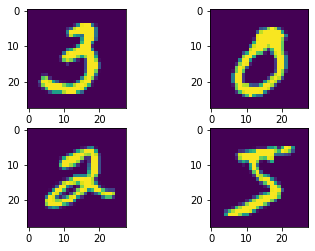

In [89]:
# Plotting the training images

plt.subplot(2, 2, 1)
plt.imshow(x_train[675])
plt.subplot(2, 2, 2)
plt.imshow(x_train[75])
plt.subplot(2, 2, 3)
plt.imshow(x_train[5])
plt.subplot(2, 2, 4)
plt.imshow(x_train[0])
print(y_train[675], y_train[75], y_train[5], y_train[0])


In [90]:
# Preprocessing the data

x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

x_train = x_train / 255
x_valid = x_valid / 255

x_train.dtype


dtype('float64')

In [91]:
# Categorical Encoding

num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

y_train[0:9]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [92]:
# Model Creation

model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=10, activation='softmax'))


In [93]:
# Model Summary

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Compiling the model

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(), metrics=['accuracy'])


In [95]:
# Fitting the model

history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)


Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1859 - accuracy: 0.9423 - val_loss: 0.1057 - val_accuracy: 0.9674
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0785 - accuracy: 0.9756 - val_loss: 0.0930 - val_accuracy: 0.9735
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0537 - accuracy: 0.9827 - val_loss: 0.0863 - val_accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0418 - accuracy: 0.9868 - val_loss: 0.0948 - val_accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.0970 - val_accuracy: 0.9733


In [96]:
# Evaluating our model

model.evaluate(x_valid, y_valid, verbose=1)


313/313 [==============================] - 0s 1ms/step - loss: 0.0970 - accuracy: 0.9733


[0.09696721285581589, 0.9732999801635742]

In [98]:
# Saving the model

filepath = './hello_world'
save_model(model, filepath)

INFO:tensorflow:Assets written to: ./hello_world\assets


In [99]:
# Loading the model
model = load_model(filepath,
 compile = True)

1/1 [==============================] - 0s 19ms/step - loss: 4.3562e-04 - accuracy: 1.0000


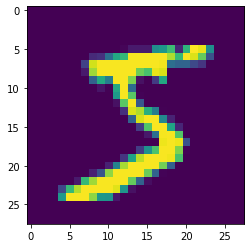

In [120]:
model.evaluate(x_valid[0:1],y_valid[0:1])
plt.imshow(x_train[0].reshape(28,28))